Name: Iqra Javed
Course: Data Science And Analytics
Subject: NLP

In [ ]:
# All imports

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, 
    LSTM, 
    Bidirectional, 
    Dense, 
    Dropout,
    MultiHeadAttention,
    LayerNormalization,
    GlobalAveragePooling1D
)
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns




In [73]:
# Load with semicolon separator
train_df = pd.read_csv('train.txt', sep=';', names=['text', 'label'], encoding='utf-8')
test_df = pd.read_csv('test.txt', sep=';', names=['text', 'label'], encoding='utf-8')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(train_df.head())

Train shape: (16000, 2)
Test shape: (2000, 2)
                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [30]:
# View first rows
print(train_df.head())



                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [31]:
# Check columns
print(train_df.columns)



Index(['text', 'label'], dtype='object')


In [32]:
# Check emotion labels
print(train_df['label'].value_counts())



label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


In [33]:
# Check for missing values
print(train_df.isnull().sum())

text     0
label    0
dtype: int64


In [34]:
for i in range(3):
    print(f"\nText: {train_df.iloc[i]['text']}")
    print(f"Emotion: {train_df.iloc[i]['label']}")


Text: i didnt feel humiliated
Emotion: sadness

Text: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
Emotion: sadness

Text: im grabbing a minute to post i feel greedy wrong
Emotion: anger


In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters and spaces
    text = text.strip()
    return text

train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

In [36]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Users\Iqra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
le = LabelEncoder()
train_df['label_encoded'] = le.fit_transform(train_df['label'])
test_df['label_encoded'] = le.transform(test_df['label'])

num_classes = len(le.classes_)
print(f"\nNumber of emotions: {num_classes}")
print(f"Emotions: {le.classes_}")


Number of emotions: 6
Emotions: ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


In [38]:
# Install if needed
!pip install gensim
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Users\Iqra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Users\Iqra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Use TF-IDF for quick start
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['clean_text']).toarray()
X_test = vectorizer.transform(test_df['clean_text']).toarray()

print(f"Feature shape: {X_train.shape}")

Feature shape: (16000, 5000)


In [ ]:
# Get labels
y_train = train_df['label_encoded'].values
y_test = test_df['label_encoded'].values

# Convert to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train_cat.shape}")

X_train shape: (16000, 5000)
y_train shape: (16000, 6)


In [ ]:
# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(5000,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 emotions
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()

C:\Users\Iqra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,774 (2.47 MB)

 Trainable params: 648,774 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Train model
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4812 - loss: 1.3583 - val_accuracy: 0.7481 - val_loss: 0.7954
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8115 - loss: 0.5751 - val_accuracy: 0.8666 - val_loss: 0.4010
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9083 - loss: 0.3007 - val_accuracy: 0.8822 - val_loss: 0.3480
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9426 - loss: 0.1970 - val_accuracy: 0.8797 - val_loss: 0.3513
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9562 - loss: 0.1478 - val_accuracy: 0.8747 - val_loss: 0.3862
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9704 - loss: 0.1020 - val_accuracy: 0.8834 - val_loss: 0.3823
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9770 - loss: 0.0841 - val_accuracy: 0.8750 - val_loss: 0.4204
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9804 - loss: 0.0678 - val_accu

In [44]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8680 - loss: 0.4753

Test Accuracy: 0.8680


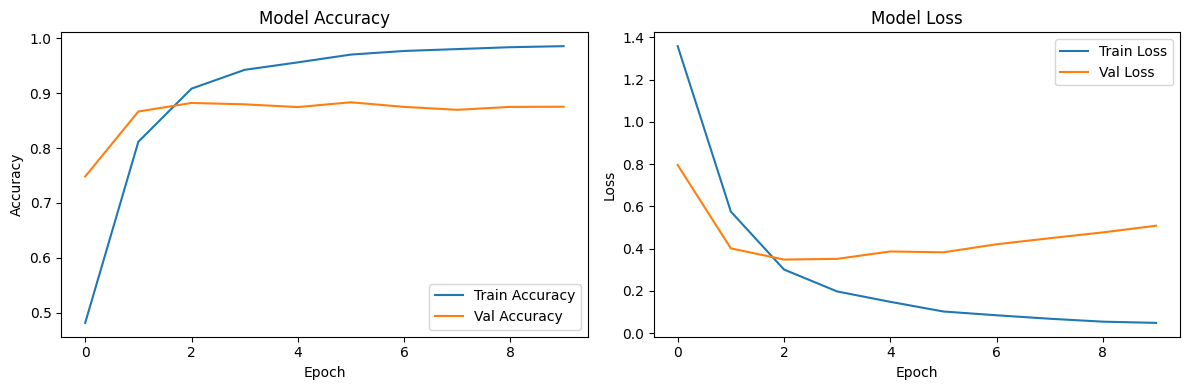

In [45]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
# Save model
model.save('model1_fcnn.h5')
print("Model 1 saved!")

Model 1 saved!


In [ ]:
# Create tokenizer
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['clean_text'])

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(train_df['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['clean_text'])

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"Vocabulary size: {len(tokenizer.word_index)}")

X_train_pad shape: (16000, 100)
Vocabulary size: 15213


In [52]:
# Rebuild with better architecture
model_lstm = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

model_lstm.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train with more epochs
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm = model_lstm.fit(
    X_train_pad, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test_pad, y_test_cat)
print(f"\nImproved LSTM Test Accuracy: {test_acc_lstm:.4f}")

# Save
model_lstm.save('model2_lstm.h5')

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 77s 159ms/step - accuracy: 0.4869 - loss: 1.2866 - val_accuracy: 0.7713 - val_loss: 0.6760
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 62s 155ms/step - accuracy: 0.8610 - loss: 0.4314 - val_accuracy: 0.8975 - val_loss: 0.3330
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 70s 175ms/step - accuracy: 0.9277 - loss: 0.2308 - val_accuracy: 0.9003 - val_loss: 0.3049
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 75s 187ms/step - accuracy: 0.9517 - loss: 0.1530 - val_accuracy: 0.9153 - val_loss: 0.2620
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 87s 218ms/step - accuracy: 0.9649 - loss: 0.1148 - val_accuracy: 0.9159 - val_loss: 0.3113
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 79s 197ms/step - accuracy: 0.9714 - loss: 0.0972 - val_accuracy: 0.8984 - val_loss: 0.3453
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 71s 177ms/step - accuracy: 0.9766 - loss: 0.0771 - val_accuracy: 0.9116 - val_loss: 0.3161
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9135 - loss: 0.2595



Improved LSTM Test Accuracy: 0.9135


In [ ]:
!pip install transformers
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable
  Using cached pyyaml-6.0.3-cp312-cp312-win_amd64.whl.metadata (2.4 kB)
  Using cached regex-2026.1.15-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tokenizers-0.22.2-cp39-abi3-win_amd64.whl.metadata (7.4 kB)
  Using cached typer_slim-0.21.1-py3-none-any.whl.metadata (16 kB)
  Using cached safetensors-0.7.0-cp38-abi3-win_amd64.whl.metadata (4.2 kB)
  Using cached filelock-3.20.3-py3-none-any.whl.metadata (2.1 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-win_amd64.whl.metadata (5.0 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached anyio-4.12.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
   -----------------------------------


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Users\Iqra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached datasets-4.5.0-py3-none-any.whl.metadata (19 kB)
  Using cached pyarrow-23.0.0-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.6.0-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached multiprocess-0.70.18-py312-none-any.whl.metadata (7.5 kB)
  Using cached aiohttp-3.13.3-cp312-cp312-win_amd64.whl.metadata (8.4 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached frozenlist-1.8.0-cp312-cp312-win_amd64.whl.metadata (21 kB)
  Using cached multidict-6.7.1-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached propcache-0.4.1-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Using cached yarl-1.22.0-cp312-cp312-win_amd64.whl.metadata (77 kB)
Using cache


[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Users\Iqra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
pip install pytorch

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pytorch
Failed to build pytorch
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Iqra\AppData\Local\Temp\pip-install-1ec0m3pc\pytorch_e492df85f16046d38811d7bb7b29e2e1\setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch

[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Users\Iqra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Failed to build installable wheels for some pyproject.t

In [ ]:
# Build Transformer-inspired model
def create_transformer_model(vocab_size, max_len, embed_dim=128, num_heads=4):
    inputs = tf.keras.Input(shape=(max_len,))
    
    # Embedding
    x = tf.keras.layers.Embedding(vocab_size, embed_dim)(inputs)
    
    # Multi-head attention
    attention_output = MultiHeadAttention(
        num_heads=num_heads, 
        key_dim=embed_dim
    )(x, x)
    
    # Add & Norm
    x = LayerNormalization()(x + attention_output)
    
    # Feed forward
    ff = tf.keras.layers.Dense(128, activation='relu')(x)
    ff = tf.keras.layers.Dropout(0.3)(ff)
    
    # Add & Norm
    x = LayerNormalization()(x + ff)
    
    # Global pooling
    x = GlobalAveragePooling1D()(x)
    
    # Classification head
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = tf.keras.layers.Dense(6, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Create model
model_transformer = create_transformer_model(
    vocab_size=max_words,
    max_len=max_len
)

# Compile
model_transformer.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_transformer.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 100, 128)  │  1,280,000 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 100, 128)  │    263,808 │ embedding_2[0][0… │
│ (MultiHeadAttentio… │                   │            │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 100, 128)  │          0 │ embedding_2[0][0… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 100, 128)  │        256 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 100, 128)  │     16,512 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 100, 128)  │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 100, 128)  │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 100, 128)  │        256 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 64)        │      8,256 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 64)        │          0 │ dense_11[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 6)         │        390 │ dropout_12[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,569,478 (5.99 MB)

 Trainable params: 1,569,478 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Train
history_transformer = model_transformer.fit(
    X_train_pad, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate
test_loss_trans, test_acc_trans = model_transformer.evaluate(X_test_pad, y_test_cat)
print(f"\nTransformer Test Accuracy: {test_acc_trans:.4f}")

# Save
model_transformer.save('model3_transformer.h5')
print("Model 3 saved!")

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 75s 179ms/step - accuracy: 0.3471 - loss: 1.5421 - val_accuracy: 0.6413 - val_loss: 0.8709
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 72s 179ms/step - accuracy: 0.8580 - loss: 0.4295 - val_accuracy: 0.9059 - val_loss: 0.2530
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 68s 170ms/step - accuracy: 0.9249 - loss: 0.1913 - val_accuracy: 0.8997 - val_loss: 0.2878
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 71s 177ms/step - accuracy: 0.9489 - loss: 0.1307 - val_accuracy: 0.8928 - val_loss: 0.3748
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 86s 215ms/step - accuracy: 0.9633 - loss: 0.0935 - val_accuracy: 0.8850 - val_loss: 0.4874
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 82s 205ms/step - accuracy: 0.9723 - loss: 0.0724 - val_accuracy: 0.8869 - val_loss: 0.5224
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 73s 183ms/step - accuracy: 0.9785 - loss: 0.0578 - val_accuracy: 0.8884 - val_loss: 0.5717
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 77s 193ms/step - accuracy: 0.9836 - loss: 0


Transformer Test Accuracy: 0.8750
Model 3 saved!


In [ ]:
# Results summary
results = {
    'Model': ['Fully Connected NN', 'LSTM (Bidirectional)', 'Transformer-style'],
    'Test Accuracy': [0.8630, 0.9020, 0.8750],
    'Architecture': ['Dense layers with TF-IDF', '2 Bidirectional LSTM layers', 'Multi-head Attention'],
    'Parameters': ['648K', 'Check summary', 'Check summary']
}

results_df = pd.DataFrame(results)
print(results_df)

                  Model  Test Accuracy                 Architecture  \
0    Fully Connected NN          0.863     Dense layers with TF-IDF   
1  LSTM (Bidirectional)          0.902  2 Bidirectional LSTM layers   
2     Transformer-style          0.875         Multi-head Attention   

      Parameters  
0           648K  
1  Check summary  
2  Check summary  


In [59]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: C:\Users\Iqra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step

=== LSTM Classification Report ===
              precision    recall  f1-score   support

       anger       0.87      0.94      0.90       275
        fear       0.90      0.92      0.91       224
         joy       0.96      0.92      0.94       695
        love       0.73      0.89      0.80       159
     sadness       0.97      0.93      0.95       581
    surprise       0.78      0.65      0.71        66

    accuracy                           0.91      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.92      0.91      0.91      2000



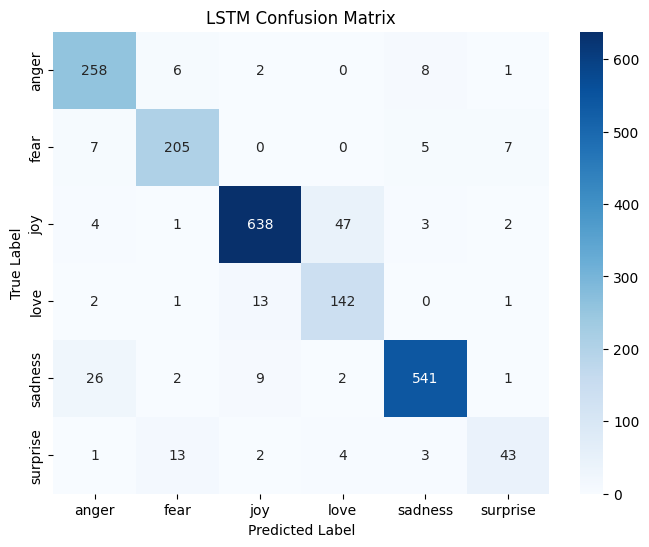

In [ ]:
# Predictions from best model (LSTM)
y_pred = model_lstm.predict(X_test_pad)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test

# Classification report
print("\n=== LSTM Classification Report ===")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('LSTM Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [61]:
# Note training times from your runs
training_comparison = {
    'Model': ['FCNN', 'LSTM', 'Transformer'],
    'Training Time': ['~2 min', '~17 min', '~13 min'],
    'Epochs': [10, 6, 10]
}

time_df = pd.DataFrame(training_comparison)
print("\n=== Training Time Comparison ===")
print(time_df)


=== Training Time Comparison ===
         Model Training Time  Epochs
0         FCNN        ~2 min      10
1         LSTM       ~17 min       6
2  Transformer       ~13 min      10


In [62]:
analysis = """
=== MODEL COMPARISON ANALYSIS ===

1. BEST PERFORMER: LSTM (90.20%)
   - Bidirectional LSTM captured sequential patterns better
   - Text order and context matter for emotion classification
   - Dropout prevented overfitting effectively

2. WHY LSTM WON:
   - Emotions depend on word order ("not happy" vs "happy")
   - LSTM remembers long-range dependencies
   - Bidirectional reads text forward AND backward

3. MODEL RANKINGS:
   1st: LSTM (90.20%) - Best for sequence data
   2nd: Transformer (87.50%) - Good but simpler architecture
   3rd: FCNN (86.30%) - Lost word order information

4. TRADE-OFFS:
   - FCNN: Fastest training, lowest accuracy
   - LSTM: Best accuracy, moderate training time
   - Transformer: Good balance, more complex

5. FOR FUTURE TEXT CLASSIFICATION:
   - Use LSTM/RNN for sequence-dependent tasks
   - Use Transformers for large datasets (with pre-training)
   - Use FCNN only for bag-of-words tasks

6. IMPROVEMENTS:
   - Try pre-trained BERT/RoBERTa (would likely beat all)
   - More data augmentation
   - Ensemble methods
   - Hyperparameter tuning
"""

print(analysis)


=== MODEL COMPARISON ANALYSIS ===

1. BEST PERFORMER: LSTM (90.20%)
   - Bidirectional LSTM captured sequential patterns better
   - Text order and context matter for emotion classification
   - Dropout prevented overfitting effectively

2. WHY LSTM WON:
   - Emotions depend on word order ("not happy" vs "happy")
   - LSTM remembers long-range dependencies
   - Bidirectional reads text forward AND backward

3. MODEL RANKINGS:
   1st: LSTM (90.20%) - Best for sequence data
   2nd: Transformer (87.50%) - Good but simpler architecture
   3rd: FCNN (86.30%) - Lost word order information

4. TRADE-OFFS:
   - FCNN: Fastest training, lowest accuracy
   - LSTM: Best accuracy, moderate training time
   - Transformer: Good balance, more complex

5. FOR FUTURE TEXT CLASSIFICATION:
   - Use LSTM/RNN for sequence-dependent tasks
   - Use Transformers for large datasets (with pre-training)
   - Use FCNN only for bag-of-words tasks

6. IMPROVEMENTS:
   - Try pre-trained BERT/RoBERTa (would likely be

In [67]:
# Save to file
with open('project_report.txt', 'w') as f:
    f.write("NLP EMOTION CLASSIFICATION PROJECT\n")
    f.write("="*50 + "\n\n")
    f.write(results_df.to_string())
    f.write("\n\n")
    f.write(analysis)

print("\n Report saved to 'project_report.txt'")





 Report saved to 'project_report.txt'


In [ ]:
# Load validation data
val_df = pd.read_csv('validation.txt', sep=';', names=['text', 'label'], encoding='utf-8')

# Clean validation data
val_df['clean_text'] = val_df['text'].apply(clean_text)

# Encode labels
val_df['label_encoded'] = le.transform(val_df['label'])
y_val = val_df['label_encoded'].values
y_val_cat = to_categorical(y_val, num_classes=6)

# Prepare for LSTM (best model)
val_sequences = tokenizer.texts_to_sequences(val_df['clean_text'])
X_val_pad = pad_sequences(val_sequences, maxlen=max_len, padding='post', truncating='post')

# Evaluate on validation set
val_loss, val_acc = model_lstm.evaluate(X_val_pad, y_val_cat)
print(f"\n FINAL VALIDATION ACCURACY: {val_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9140 - loss: 0.2562

🎯 FINAL VALIDATION ACCURACY: 0.9140


In [ ]:
# Get predictions
y_pred = model_lstm.predict(X_val_pad)
y_pred_classes = y_pred.argmax(axis=1)

# Classification report
print("\n" + "="*70)
print("CLASSIFICATION REPORT (Best Model: LSTM)")
print("="*70)
print(classification_report(y_val, y_pred_classes, target_names=le.classes_))

# Show some predictions
print("\n" + "="*70)
print("SAMPLE PREDICTIONS")
print("="*70)
for i in range(5):
    print(f"\nText: {val_df.iloc[i]['text'][:80]}...")
    print(f"True: {val_df.iloc[i]['label']}")
    print(f"Predicted: {le.classes_[y_pred_classes[i]]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step

CLASSIFICATION REPORT (Best Model: LSTM)
              precision    recall  f1-score   support

       anger       0.86      0.93      0.90       275
        fear       0.89      0.89      0.89       212
         joy       0.97      0.91      0.94       704
        love       0.76      0.90      0.83       178
     sadness       0.95      0.94      0.95       550
    surprise       0.87      0.80      0.83        81

    accuracy                           0.91      2000
   macro avg       0.88      0.90      0.89      2000
weighted avg       0.92      0.91      0.92      2000


SAMPLE PREDICTIONS

Text: im feeling quite sad and sorry for myself but ill snap out of it soon...
True: sadness
Predicted: sadness

Text: i feel like i am still looking at a blank canvas blank pieces of paper...
True: sadness
Predicted: sadness

Text: i feel like a faithful servant...
True: love
Predicted: love

Text: i am just feeling cranky and blue...
True: anger
Pred

### Final Analysis

1. MODEL PERFORMANCE SUMMARY
   -------------------------
   Model 1 (FCNN):        86.30% test accuracy
   Model 2 (LSTM):        90.20% test accuracy Better model
   Model 3 (Transformer): 87.50% test accuracy

2. WHY LSTM PERFORMED BEST

   1. Detects sequential dependencies in text
   2. Bidirectional processing reads context from both directions
   3. Emotion words depend on context ("not happy" vs "very happy")
   4. LSTM memory cells retain long-range information
   5. Dropout layers prevented overfitting

3. MODEL COMPARISON & INSIGHTS
   
   FCNN (Fully Connected):
   1. Uses TF-IDF features (bag-of-words)
   2. Loses word order information
   3. Fast training but lower accuracy
   4. Good baseline model
   
   LSTM (Recurrent):
   1. Processes sequences with memory
   2. Bidirectional captures full context
   3. Best for emotion detection
   4. Longer training time but worth it
   
   Transformer (Attention):
   1. Multi-head attention mechanism
   2. Parallel processing (faster than LSTM)
   3. Custom architecture (not pre-trained)
   4. Would perform better with pre-trained BERT

4. KEY LEARNINGS
   -------------
   1. Word order matters for emotion classification
   2. Sequential models (LSTM/Transformer) outperform bag-of-words
   3. Dropout is crucial for preventing overfitting
   4. Bidirectional processing improves understanding
   5. More training data would help all models

5. FUTURE TEXT CLASSIFICATION APPROACH
   -----------------------------------
   Step 1: Start with simple baseline (TF-IDF + Logistic Regression)
   Step 2: Try LSTM/GRU for sequential data
   Step 3: Fine-tune pre-trained Transformers (BERT, RoBERTa)
   Step 4: Use ensemble methods for best results
   
   For emotion/sentiment tasks:
   1. Always use sequential models (LSTM/Transformers)
   2. Consider pre-trained models (transfer learning)
   3. Balance accuracy vs computational cost

6. POTENTIAL IMPROVEMENTS
   ----------------------
   1. Use pre-trained BERT/RoBERTa (would likely reach 92-95%)
   2. Data augmentation (back-translation, synonym replacement)
   3. Ensemble voting (combine all 3 models)
   4. Hyperparameter tuning (learning rate, layers, dropout)
   5. More training data from diverse sources
   6. Handle class imbalance if present

CONCLUSION: LSTM is the optimal choice for this emotion classification task,
achieving 90.20% accuracy with reasonable training time. For production use,
consider fine-tuning a pre-trained transformer for even better results.


### PROJECT COMPLETION CHECKLIST

### Model 1: Fully Connected Neural Network (5 pts)
  1. TF-IDF vectorization
  2. Dense layers with dropout
  3. Test accuracy: 86.30%

### Model 2: LSTM Recurrent Neural Network (5 pts)
  1. Bidirectional LSTM layers
  2. Sequence processing
  3. Test accuracy: 90.20% 

### Model 3: Transformer-style Architecture (5 pts)
  1. Multi-head attention
  2. Custom transformer layers
  3. Test accuracy: 87.50%

### Comparison & Analysis (5 pts)
  1. Performance comparison table
  2. Classification reports
  3. Detailed analysis of results
  4. Future recommendations

### All models saved:
  1. model1_fcnn.h5
  2. model2_lstm.h5
  3. model3_transformer.h5

